# Workbook 10: Informed Search Algorithms

## Introduction
This practical uses a simple easy-to-visualise optimisation problem to illustrate the properties of different search algorithms.
The problem is this:
- We are given  a model of a problem in terms of a graph  - which we can visualise as a maze.
- We are given a starting position and the desired endpoint (goal)
- The problem is to find a sequence of inputs that takes us from the start to the goal, preferably in as few moves as possible.

## Aims of this practical
1. To give you the opportunity to demonstrate your underrstanding by implementing the code needed to create different search algorithms.
2. To give you experience of comparing the behaviour of different search algorithms.
3. To give you experience of evaluating the efficiency of an algorithm for a problem ( in thid case path-planning) by creating different instances of a problem (mazes) to *stress-test* different methods. 


   

<div class = "alert alert-info" style="color:black">
 <h2>Refresher: finding things in a list with python according to some criteria</h2>
    <ul>
        <li> A simple for loop looks like: for i in range(n): <br> and loops. from i=0 to i=n-1</li>
    <li> if you have a list myList with n elements, then len(myList) = n </li>
    <li> This is true whether the elements are chars, ints, float, or objects of some class</li>
    </ul>
    <p> So if  myList hold elements of a type that has an attribute cost, and we want to find the index (position) of the element one with the lowest value, we can do it like this:<br> Start in position 0 <br> then loop through each element, remembering where the one with the lowest value of score came.</p>
    <p> In code this looks like:<pre class="line-numbers"><code class="language-python">
   bestSoFar = 0
   for i in range (len (myList) ):
       if (myList[i].cost < myList[bestSoFar].cost): 
           bestSoFar = i
  </code>
</pre>
and at the end of this process the variable bestSoFar tells us the index of the "best" element in that list according to our choice criteria (minimising cost).<br>
If we want to use something else as our criteria, we just change the if statement.
</div>
                                       
                                       
                                       
                                       

## Background

<img src = "figures/generate-and-test-framework.png">




### Pseudocode for informed search
Initialisation
```
## make initial guess,  
SET workingCandidate = StartSolution
## Test it
Evaluate (workingCandidate)
IF( IsAtGoal(workingCandidate)) 
    OUTPUT (SUCCESS, workingCandidate)
## Start the openList 
APPEND workingCandidate to openList
```

Main loop
```
    WHILE ( Openlist not empty) DO
      SORT(OpenList)                  ## This is the new line 
      MOVE (first item from openList into working candidate)
      FOREACH (1-step neighbour)
        neighbour = ApplyMoveOperator(workingCandidate)  ## Generate
        Evaluate(neighbour)                              ## Test 
	    IF(IsAtGoal(neighbour))
          OUTPUT (SUCCESS, neighbour)
        ELSE IF (neighbor is feasible)                   ## Update Memory
          APPEND( neighbor to end of openList)
        ELSE
          APPEND( neighbor to end of closedList)
      COPY (working candidate to closedList)
 
    ** only get this far if we've run out of candidate solutions to test
    OUTPUT (FAILURE, workingCandidate)
```




<div class="alert alert-block alert-danger"> The only difference to `uninformed search is the extra line at the start of  each iteration: <b>Sort(OpenList)</b> <br>Sorting our list once makes things faster if we subsequently insert things in the right place to keep it sorted. <br>
<b>In practice can just leave unsorted and pick the best according to our sort criteria</b></div> 

<div class = "alert alert-warning" style="color:black">
    <h2> Activity One: Quick inspection of common functions to implement. the framework (10 minutes max) </h2>
<p>Run the three cells below to:   </p>
<ul>
    <li> import the modules and the supporting code for this practical</li>
    <li> define a common "initialise" method.</li>
    <li> define a common implementation for the main search loop.</li>
    </ul>
 
  
<p>    Note how virtually all the code that handles the <b>problem</b> is abstracted into:</p>
    <ul>
        <li>evaluate(): which tests a solution and stores the estimated distance from the goal in its quality attribute</li>
        <li>IsAtGoal(): which checks if a soltion reaches the goal state</li>
        <li> displaySearchState(): which displays a candidateSolution and the openList</li>
        <li> The list <it>moveSet</it> which lists the possible moves</li>
        <li>The three lines 27-29 in runMainSearchLoop(): that create a new meighbour by appending a possible move to a candidate solution.  </li>
    </ul>
<p>    Also note that all the code which defines the <b>algorithm</b> is handled via the function getNextItemForAlgorithm()</p>
</div>    



In [1]:
import workbook12_utils as wb12
from workbook12_utils import Maze,CandidateSolution, evaluate, displaySearchState, IsAtGoal, setUpMaze
import matplotlib.pyplot as plt
import copy
import numpy as np
from time import sleep
from IPython.display import clear_output
%matplotlib inline

In [2]:

#### INITIALISE SEARCH ###
def initialise(maze):
    workingCandidate = CandidateSolution()
    #get start position on maze and set this as start for search
    workingCandidate.variableValues.append(maze.start)

    #measure quality
    evaluate(workingCandidate,maze)

    #check for lucky guess
    if(IsAtGoal(workingCandidate,maze)):
        print("solution found")
        atGoal = True
    else:
        openList = []
        closedList = []
        openList.append(workingCandidate)
        atGoal = False
        
    #show first stage
    displaySearchState(maze,workingCandidate,openList,algorithm,0)    
    
    return workingCandidate, openList,closedList, atGoal





In [3]:
##================= MAIN SEACH LOOP =================
def runMainSearchLoop(maze,workingCandidate,openList, closedList):
    iteration = 0
    tested = 0
    atGoal = False
    
    #WHILE ( Openlist not empty) DO
    while( atGoal==False and  len(openList)>0 and iteration<  1000): 

        iteration = iteration + 1
    
        ######### MOVE (chosen item from openList into working candidate)    
        nextItem = getNextItemForAlgorithm(algorithm,openList) 
        workingCandidate = openList.pop(nextItem)

        # this is just for the sake of visualisation
        displaySearchState(maze, workingCandidate,openList,algorithm,tested)

        ######## GENERATE ONE STEP. NEIGHBOURS. 
        #FOREACH (1-step neighbour)
        for move in moveSet:         
        
            ##### Generate NEIGHBOUR #####
            neighbour = copy.deepcopy(workingCandidate)  
        
            #neighbour = ApplyMoveOperator(workingCandidate)
            lastCell = neighbour.variableValues [ -1] # neat bit of python indexing that returns last item in list
            nextCell = lastCell + move
            neighbour.variableValues.append(nextCell) 
        
            ##### TEST NEIGHBOUR   ###### 
            evaluate(neighbour,maze)
            tested += 1
 
            #IF AT GOAL OUTPUT (SUCCESS, neighbour)
            if(IsAtGoal(neighbour, maze)):             
                displaySearchState(maze,neighbour,openList,algorithm,tested)
                atGoal=True
                break ##takes us out of for loop
            
            ### ELSE UPDATE WORKING MEMORY ###
            elif (neighbour.quality>=0): #neighbour is feasible
                openList.append(neighbour) 
            else: #neighbour is infeasible
                closedList.append(neighbour)
 
        #### END OF FOR LOOP
        ##COPY (working candidate to closedList)
        closedList.append(workingCandidate)
    
    
    ##### END OF WHILE LOOP ###

    return atGoal,tested,len(neighbour.variableValues)

<div class = "alert alert-warning" style="color:black">
    <h2> Activity Two: Implementing Best-First search and A* </h2>
    <p>The next cell shows a partially completed implementation of the method to chose the next item from the openList to explore.<ol>
    <li> Complete the code to implement best-first and Astar search then test your code by running the cell after</li>
    <li> to compare. with my results, in your loops only improving solutions (not equals)</li>
    <li> Then answer the multiple choice questions to check your understyanding</li>
    </ol>
<p>Hint:<ul>
    <li>the class candidateSolution just holds two attributes: quality and variableValues.</li>
    <li>quality is the estimated distance to the goal, so we want to minise this. </li>
    <li>variableValues is a list of moves that define the specific candidate solution.<br> Like all lists, you can query how many things it holds via len(variableValues).</li></ul></p>
    </div>

In [4]:
def getNextItemForAlgorithm(algorithm,openList):
    next = -1
    numEntries = len(openList)
    #check openList is not empty
    if  ( numEntries == 0 ):
        print("openList was empty!")

    else:
    
        if algorithm=="depthFirst":
            # return last thing added
            next = len(openList) -1
            
        elif algorithm =="breadthFirst":
            #return oldest thing on list
            next = 0
        elif algorithm== "bestFirst" :
            # write your code here to do a simple loop that finds the index of the item in the openList
            # that has the lowest estimated distance from the goal 
            pass
        
        elif algorithm=="Astar" :
            #write your code here to do a simple loop that finds the index of the item in the openList
            # that has combined value for (estimated distance from the goal + distance ffrom start)
            pass
  
        else:
            print("unrecognised algorithm")
                             
    return next

<h2>^ write your own version of aster and best first get next item and compare ? </h2>

In [5]:
algorithm = "depthFirst"

maze, moveSet = setUpMaze("maze.txt")
workingCandidate,openList,closedList,atGoal = initialise(maze)

atGoal,tested,complexity = runMainSearchLoop(maze,workingCandidate,openList, closedList)

if(atGoal==False):
    print('failed to find solution to the problem in the time allowed!') 
else:
    print(f'Using algorithm {algorithm}, goal was found after {tested} tests with length {complexity}:')

KeyboardInterrupt: 

In [ ]:
display(wb12.Q1)
display(wb12.Q2)
display(wb12.Q3)
display(wb12.Q4)

<div class="alert alert-warning" style="color:black">
    <h2> Activity 3: Testing your understanding by creating new instances to <it>break</it> algorithms</h2>
    <p> The cell below illustrates how to create a new instance of the path-finding problem by changing walls into paths or vice-versa.</p>
    <p><b> Experiment with creating new mazes then answer the following questions.</b></p>
    </div>
    
<div class="alert alert-info" style="color:black">
    <h2> To make the code run faster ...</h2>
    <p> The method that shows the search state has the following signature: <br>
        def displaySearchState(theMaze:Maze, current:CandidateSolution, openList,algname,steps, refresh_rate= 0.0075):<br>
        You can make your search run faster by changing the pause between steps (refresh_rate), then restarting the kernel  and re-importing the module<br>
        But be wary - this may create flashing outputs.
</div.
     
     

first plot shows the initial maze
second plot shows removing a wall cell
third plot shows creating a new all cell near the bottom right


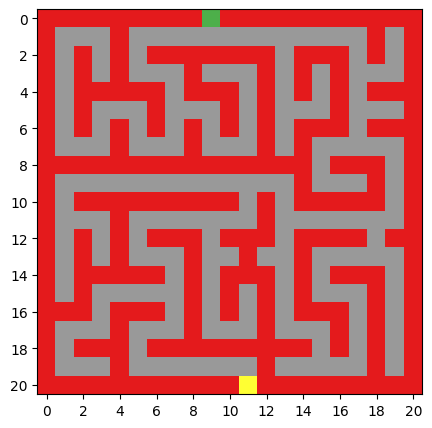

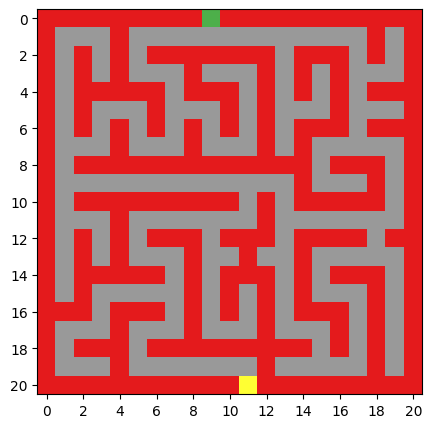

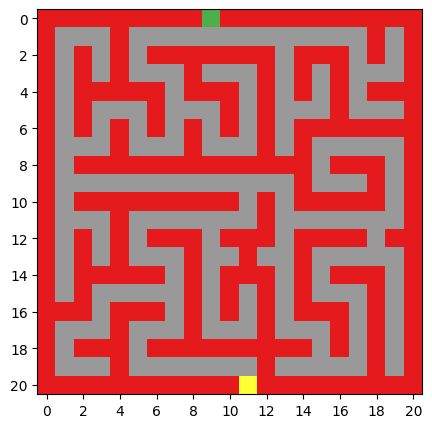

In [22]:
algorithm = "depthFirst"

maze, moveSet = setUpMaze("maze.txt")
print("first plot shows the initial maze")
#this is an example of how to make a hole in a wall
#in this case just below the entrance 
# the first value is for the row of the cell to change, the second for the column
print("second plot shows removing a wall cell")

maze.contents[8][1] = 1
maze.showMaze()

# and this turns a path into a wall
print("third plot shows creating a new all cell near the bottom right")
maze.contents[6][17] = 0
maze.showMaze()

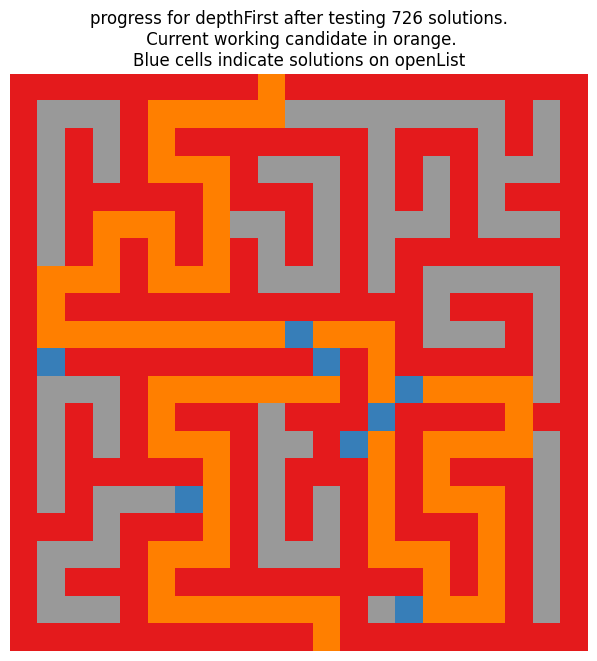

Using algorithm depthFirst, goal was found after 726 tests with length 101


In [24]:
workingCandidate,openList,closedList,atGoal = initialise(maze)

atGoal,tested,complexity = runMainSearchLoop(maze,workingCandidate,openList, closedList)

if(atGoal==False):
    print('failed to find solution to the problem in the time allowed!') 
else:
    print(f'Using algorithm {algorithm}, goal was found after {tested} tests with length {complexity}')

In [9]:


display(wb12.Q5)
display(wb12.Q6)


<h2> Now  could you try and get them to try to create a maze pattern that will break the searching algorithm (and explain why it broke the algorithm ) </h2>

<div class = "alert alert-warning" style="color:black">
<h2>Activity4 (stretch): Changing the direction we search the maze</h2>
    <ul>
        <li>The order in which the mazes is searched (i.e. left-first or right first) is determined the order that we create neighbours and put them on the openList.   </li>
       <li> This is held in the array moveSet is initialised in setUpMaze() as moveSet = [leftMove,rightMove, upMove,downMove] <br>(look in setUpMaze() to see how the values for these four variables are calculated according to the size of the maze).</li>
        <b> After the call to setUpMaze you could print out then reorder the contents of movesewt.  Do you think this will make a difference?</b>
    </ul>   
        </div>

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>